# Introduction: Credit Card Fraud Detection

Familiarizing myself with methods to handle unbalanced data with Python then build a binary classification model to predict credit card frauds. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase, and I actually had some fraud purchases happen not too long ago on myself as well but it was not flagged by the bank.

Goal here is to review methods in the preprocessing/cleaning data, unbalanced dataset solutions for modleing, and review the classification process.

*_Note: Codes may also come from other sources for practice/workflow. Informational links have been added at the bottom of the notebook._

-------------

## What else do I hope to achieve from this?

Develop a stronger understanding in data cleaning, understand why data is missing, how to work with unbalanced data which is normal in real world situations, and review methods on classification methods to combat this issue. I also want to utilize PCA, feature selection, and sklearn's pipeline function more often so I will attempt to use it on this dataset as well.

I also follow the same methodology and attempt to improve on it as much as I can on each project. See link [here](https://github.com/davidtnly/Python/tree/master/MachineLearning) for public notebooks.

Answer some of these questions below:
- What kind of machine learning algorithms are good against unbalanced datasets?
- What are the risks in our modeling and evaluation methods?
- Is my modeling process efficient with the use of pipeline() and is the EDA process useful? 
- What's SMOTE, Undersampling and Oversampling?

-------------

## Framing the problem

Can you identify fraudulent credit card transactions?

### Data

The data comes from the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset on Kaggle.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.

Please take a look at the Works Cited below for any additional information. They are all informative and gives you another perspective in working with machine learning and deep learning in the financial field.

-------------

## Machine Learning Framework

As always, here's a ML framework I like to follow or reference back to whenever I work on a project.

1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use
2. Collecting relevant information and data
    - What type of data do we have?
    - Can we use any complimentary data with that is public that will help our with our analysis/modeling?
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know if our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away?
    - Can the data be plotted?
    - What changes do we need in order to make the data usable if it's not already?
    - This step is not really an isolated step as it can encompass exploratory, feature engineering + more
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Model development & scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Normalizing the data to be on similar scales
        - Normalization, standardization methods (Z-score, minmax, median)
    - Create baseline, pre-tuned, and tuned models (includes cross-validation)
        - Create easy to more complex models if needed (think about computational cost, complexity, explainability)
    - Hyperparameter tuning
    - Fit cross-validated tuned models using best hyperparameters
    - Score model and get results
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Is the final model good enough?
    - Which features are important?
    - Iterate steps if we are proceeding with specific features selected
        - Dimensionality reduction methods (PCA, LDA) to see if we can reduce model complexity (this step can be before modeling as well)
9. Results
    - What's our conclusion?
    - What actions are we going to take?
10. Ending notes
    - Extra information that we may not go over like steps that we did not go into or missed
        - Any other possible methods/solutions that we could look at in the future

-------------

## Method of Evaluation

Since this is a binary classification problem, we will start our baseline model using a logistic regression algorithm. 

The evaluation method will be the AUPRC score which is the recommended method. AUPRC is the area under the curve where X is recall and Y is precision. This is a better measure to seek a balance between precision and recall vs. accuracy especially when there there is a higher risk in misclassifying a purchase as the bank's risk is a lot higher when it is not classified correctly or on time. Precision-Recall curves also should be used when there is a moderate to large class imbalance

Here are some performance metrics used in the confusion matrix below:

- TP - correct positive prediction
- TN - correct negative prediction
- FP - Type I Error (case negative but predicted positive)
- FN - Type II Error (case positive but predicted negative)
- Precision - how accurate is the model of those predicted positive that are actually positive
    - TP/(TP + FP)
- Recall / Sensitivity / TPR (True Positive Rate) - how many actual positives the model labeled over the total positives
    - TP/(TP + FN) which is also TP/All P
- Specificity (True Negative Rate) - number of correct negative predictions
    - TN/(TN + FP) which is also TN/All N
- F1 Score - weighted average of TPR (Recall) and Precision, useful if there is uneven class distribution like cancer detection where there can be 10,000 negatives and only 1 positive or if there is a higher risk if false negatives or false positives
    - 2 * ( (Pr * Rc) / (Pr + Rc) )
- ROC Curve
    - Graph used to summarize the performance at various thresholds by plotting the TPR against FPR
    
    
#### Methods
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1 = f1_score(y_true, yhat)
    auc = auc(recall, precision)

-------------

## Overview of the Modeling Process

In order to see if fraud is detected or not, we will use multiple classification algorithms to predict the outcome of 0 (negative) or 1 (positive). The employed classifiers are logistic regression, decision trees, random forest, support vector machines, and extreme gradient boosting. 

After each performance of the machine learning method, we will begin evaluation where we will use 10-fold cross-validation as well, which is simply a procedure used to evaluate ML models where data is limited. In the cross-validation, data is resampled to best test our evaluation metric then averaged to get an overall score.

-------------

### Import libraries

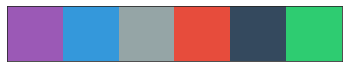

In [5]:
# Toolbox
import pandas as pd
import pandas_profiling
import numpy as np
import random
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p
from scipy import stats

# Misc
import os
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows =1000

# Set notebook colors and palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
sns.set_style('white')
sns.set_color_codes(palette='deep')
# Favorite code to use: #34995e

### Set data directory

In [6]:
# Set directory
PATH = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\LargeData'
os.chdir(PATH)
os.getcwd()
os.listdir()

['19-credit-card-defaults.csv']

### Import data

In [ ]:
data = pd.read_csv('19-credit-card-defaults.csv')

## Preprocessing

Let's take a look at the data and see the structure of the data. It's good to know how big our dataset is (200k+) so we are careful in using certain functions or plots and making sure we keep in mind our memory usage. Besides that, we will also be looking for missing values as well to get an idea on how complete the data is. We can create summary and diagnostic plots to show this. The less missing values the better and then clean up missing values and try to understand why are they missing in the first place.

In summary, some of the questions we try to answer here are:
- Are we able to use the data right away?
    - If not, why?
- Are there any missing values?
    - If not, what methods should we use to fix this?
- How clean is the data?
    - Are all values the same in a single feature?
    - Is the feature format consistent?

In [ ]:
'''

Some basic functions:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''
print('')

Data exploration. 

You should have pandas functions like .corr(), scatter_matrix() , .hist() and .bar() on the tip of your tongue. You should always be looking for opportunities to visualize your data using PCA or t-SNE, using sklearn's PCA and TSNE functions.

Feature selection. 

90% of the time, your dataset will have way more features than you need (which leads to excessive training time, and a heightened risk of overfitting). Get familiar with basic filter methods (look up scikit-learn’s VarianceThreshold and SelectKBest functions), and more sophisticated model-based feature selection methods (look up SelectFromModel).

Hyperparameter search for model optimization. 

You definitely should know what GridSearchCV does and how it works. Likewise for RandomSearchCV. To really stand out, try experimenting with skopt's BayesSearchCV to learn how you can apply bayesian optimization to your hyperparameter search.

Pipelines. 

Use sklearn's pipeline library to wrap their preprocessing, feature selection and modeling steps together. Discomfort with pipeline is a huge tell that a data scientist needs to get more familiar with their modeling toolkit.

### Works Cited

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. [Calibrating Probability with Undersampling for Unbalanced Classification](https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification). In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. [Learned lessons in credit card fraud detection from a practitioner perspective](https://www.researchgate.net/publication/260837261_Learned_lessons_in_credit_card_fraud_detection_from_a_practitioner_perspective), Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy](https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy), IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea. [Adaptive Machine learning for credit card fraud detection](http://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable framework for streaming credit card fraud detection with Spark](https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi. [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi. [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection), Information Sciences, 2019